In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
base = pd.read_csv('/home/bernardo/Documentos/curso_Machine_A-Z/dataset/census.csv')

In [14]:
previsores = base.iloc[:,0:14].values
classe = base.iloc[:,14].values

In [12]:
base.head(3)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [36]:
encoder = LabelEncoder()
previsores[:,1] = encoder.fit_transform(previsores[:,1])
previsores[:,3] = encoder.fit_transform(previsores[:,3])
previsores[:,5] = encoder.fit_transform(previsores[:,5])
previsores[:,6] = encoder.fit_transform(previsores[:,6])
previsores[:,7] = encoder.fit_transform(previsores[:,7])
previsores[:,8] = encoder.fit_transform(previsores[:,8])
previsores[:,9] = encoder.fit_transform(previsores[:,9])
previsores[:,13] = encoder.fit_transform(previsores[:,13])

In [37]:
previsores

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [38]:
onehot = OneHotEncoder(categorical_features = [1,3,5,6,7,8,9,13])
previsores = onehot.fit_transform(previsores).toarray()

/home/bernardo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/bernardo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [40]:
#classe = classe.reshape(-1,1)
enc_cla = LabelEncoder()
classe = enc_cla.fit_transform(classe)
classe.shape

(32561,)

In [41]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [44]:
xtrain, xest, ytrain, ytest = train_test_split(previsores, classe, test_size=0.2, random_state=42)

In [46]:
previsores.shape

(32561, 108)

In [5]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f308f5284a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f308f528b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f308f5280b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f308f528f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f308f4b1550>],
 'means': []}

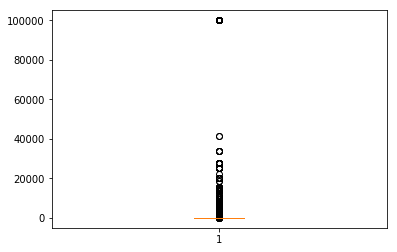

In [25]:
plt.boxplot(base.iloc[:,10])